In [675]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 7)

In [676]:
archivo = 'Libro1.xlsx'
archivo_pred = '2021.xlsx'
X_pred = pd.read_excel(archivo_pred)

In [677]:
archivo_val = '2021RILI.xlsx'
y_val = pd.read_excel(archivo_val,header=None,names=['real'])
y_val

,real
0,160159.05
1,173526.05
2,182515.65


In [678]:
df = pd.read_excel(archivo)
df.head()

,Año,Mes,Dia,BRO
0,2016,1,9,574017
1,2016,1,16,588433
2,2016,1,23,590953
3,2016,1,30,600105
4,2016,2,6,600680


In [679]:
df.describe()

,Año,Mes,Dia,BRO
count,260.000000,260.000000,260.000000,260.000000
mean,2018.000000,6.569231,15.769231,254428.550000
std,1.416941,3.443843,8.792361,114716.125282
min,2016.000000,1.000000,1.000000,105625.000000
25%,2017.000000,4.000000,8.000000,195936.250000
50%,2018.000000,7.000000,16.000000,223660.000000
75%,2019.000000,10.000000,23.000000,266680.250000
max,2020.000000,12.000000,31.000000,600680.000000


In [680]:
arreglox = df.iloc[:, :-1].values
arregloy = df[df.columns[3]].values

In [681]:
arreglox;

In [682]:
arregloy;

In [683]:
X_train, X_test, y_train, y_test = train_test_split(arreglox, arregloy)

In [684]:
X_train;

In [685]:
knn=KNeighborsRegressor(n_neighbors=4)

In [686]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [687]:
knn.score(X_test,y_test)

0.3697240992974977

In [688]:
y_pred = knn.predict(X_test)

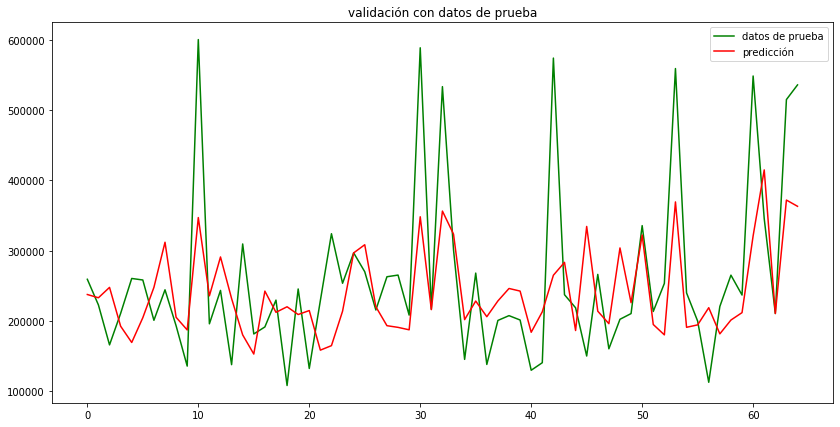

In [689]:
plt.plot(range(len(y_test)),y_test,c='g')
plt.plot(range(len(y_pred)),y_pred,c='r')
plt.title('validación con datos de prueba')
plt.legend(['datos de prueba','predicción'])
plt.show()

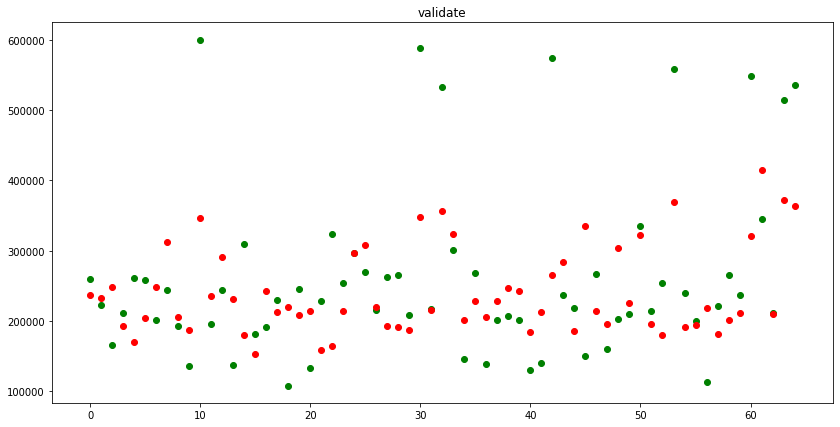

In [690]:
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.title('validate')
plt.show()

In [691]:
y_prediccion = knn.predict(X_pred)
y_model = y_prediccion[0:3]

In [735]:
diferencia = np.array(y_val).transpose() - (np.array(y_model))
diferencia.transpose()
comparar = diferencia.transpose()
comparar
abs(comparar)

array([[43426.2 ],
       [43091.95],
       [50700.1 ]])

In [693]:
del knn

In [694]:
X_train, X_test, y_train, y_test = train_test_split(arreglox, arregloy)

In [695]:
rl = LinearRegression()

In [696]:
rl.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [697]:
y_pred = rl.predict(X_test)

In [698]:
rl.score(X_test,y_test)

0.43034426965712125

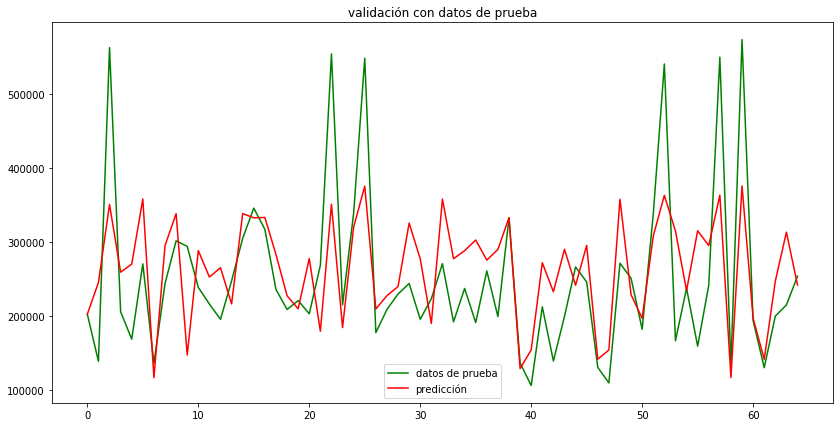

In [699]:
plt.plot(range(len(y_test)),y_test,c='g')
plt.plot(range(len(y_pred)),y_pred,c='r')
plt.title('validación con datos de prueba')
plt.legend(['datos de prueba','predicción'])
plt.show()

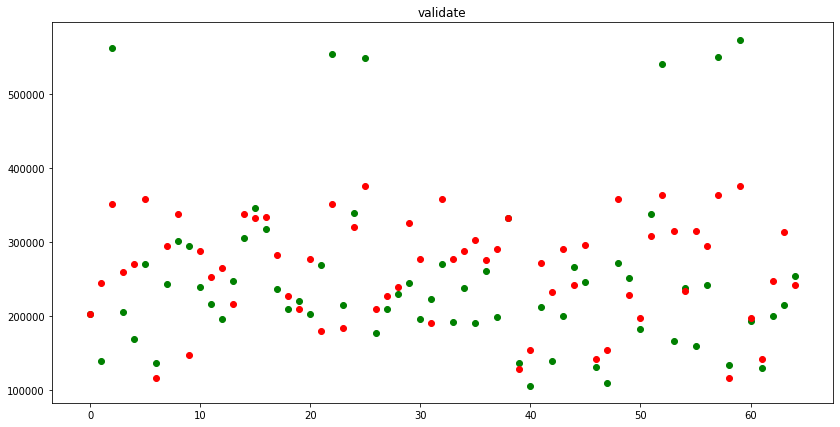

In [700]:
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.title('validate')
plt.show()

In [701]:
y_prediccion = rl.predict(X_pred)

In [734]:
diferencia = np.array(y_val).transpose() - (np.array(y_prediccion[0:3]))
diferencia.transpose()
comparar = diferencia.transpose()
comparar
abs(comparar)

array([[35332.08985725],
       [21908.4420574 ],
       [12862.19425756]])

In [703]:
del rl

In [704]:
arreglox = df[df.columns[0:3]].values
arregloy = df[df.columns[3]].values

In [705]:
X_train, X_test, y_train, y_test = train_test_split(arreglox, arregloy)

In [706]:
poli_reg = PolynomialFeatures(degree=8)

In [707]:
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [708]:
pr = linear_model.LinearRegression()

In [709]:
pr.fit(X_train_poli, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [710]:
pr.score(X_test_poli,y_test)

0.7189108835914979

In [711]:
y_pred_pr = pr.predict(X_test_poli)

In [712]:
y_pred_pr

array([228699.62060547, 395528.29492188, 464542.60449219, 536015.71630859,
       135792.68115234, 225676.18798828, 282531.56640625, 189249.28466797,
       218081.42431641, 123874.46191406, 224433.13232422, 319231.31933594,
       163601.55224609, 199801.11279297,  36819.4609375 , 182439.58105469,
       303238.04443359, 191388.67431641, 585395.22607422, 267746.30908203,
       366568.72119141, 379232.32714844, 222730.65283203, 160762.39013672,
       244721.64648438, 245635.15966797, 346813.00341797, 188936.94189453,
       135878.21386719, 258586.52001953, 275297.43701172, 311065.17724609,
       429590.31103516, 576967.74267578, 612077.43847656, 256664.81933594,
       274690.06933594,  49666.06201172, 189022.47167969, 322241.98291016,
       286898.40625   , 284264.28515625, 237707.49560547, 332861.10546875,
       241925.54736328, 251724.05517578, 264862.67089844, 633760.37304688,
       158568.22070312, 224593.00439453, 175326.77441406, 176360.88037109,
       221047.08349609, 2

In [713]:
X_pred_poli = poli_reg.fit_transform(X_pred)

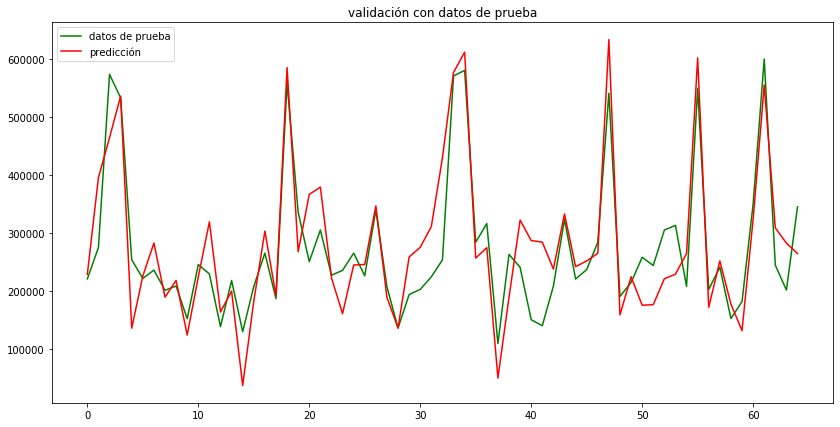

In [714]:
plt.plot(range(len(y_test)),y_test,c='g')
plt.plot(range(len(y_pred_pr)),y_pred_pr,c='r')
plt.title('validación con datos de prueba')
plt.legend(['datos de prueba','predicción'])
plt.show()

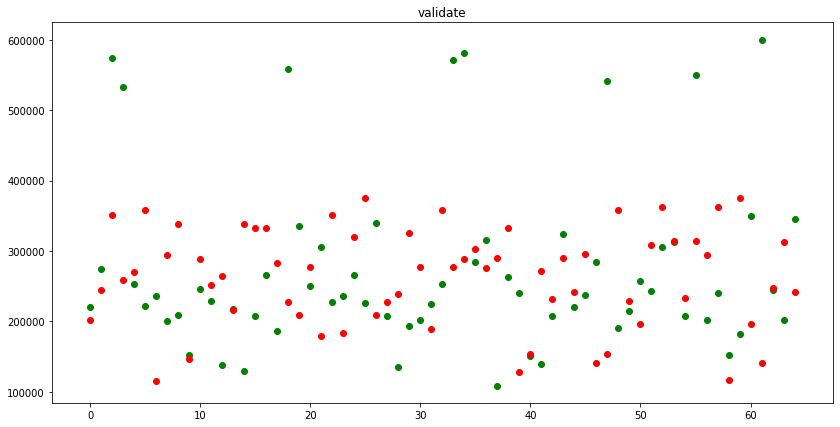

In [715]:
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.title('validate')
plt.show()

In [716]:
y_pred = pr.predict(X_pred_poli)
y_pred

array([585871.421875  , 366036.37451172, 218676.74023438, 306072.98095703,
       941229.79638672, 305034.42480469, 138042.48388672,  46039.24853516,
       272872.95166016])

In [733]:
diferencia = np.array(y_val).transpose() - (np.array(y_pred[0:3]))
diferencia.transpose()
comparar = diferencia.transpose()
abs(comparar)

array([[190216.52846695],
       [ 21750.56944863],
       [ 58674.36730305]])

In [718]:
del pr

In [719]:
ml = LinearRegression()

In [720]:
X_train, X_test, y_train, y_test = train_test_split(arreglox, arregloy)

In [721]:
ml.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [722]:
ml.score(X_test,y_test)

0.4685046715430503

In [723]:
y_pred = ml.predict(X_test)

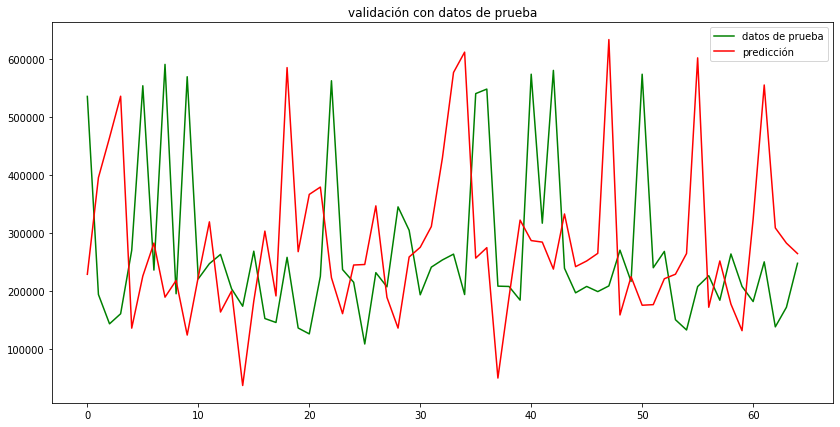

In [724]:
plt.plot(range(len(y_test)),y_test,c='g')
plt.plot(range(len(y_pred_pr)),y_pred_pr,c='r')
plt.title('validación con datos de prueba')
plt.legend(['datos de prueba','predicción'])
plt.show()

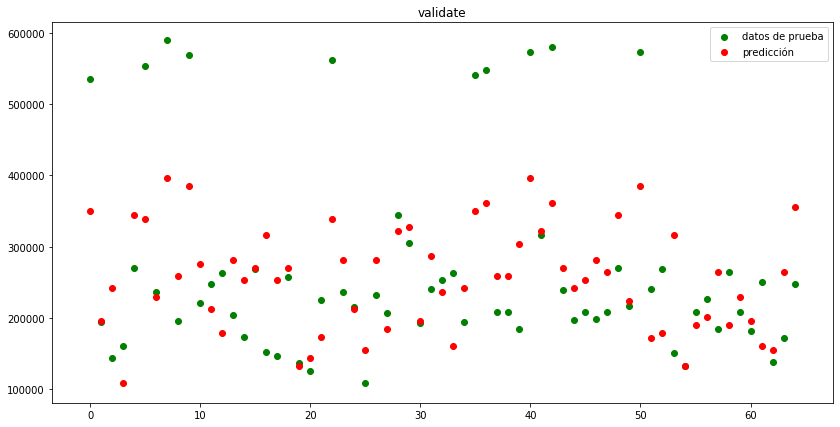

In [725]:
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.title('validate')
plt.legend(['datos de prueba','predicción'])
plt.show()

In [726]:
y_prediccion = ml.predict(X_pred)

In [732]:
diferencia = np.array(y_val).transpose() - (np.array(y_prediccion[0:3]))
diferencia.transpose()
comparar = diferencia.transpose()
abs(comparar)

array([[35332.08985725],
       [21908.4420574 ],
       [12862.19425756]])

In [728]:
del ml

In [729]:
svr = SVR(kernel='linear',C=0.1, epsilon=0.1)

In [730]:
svr.fit(X_train, y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [731]:
svr.score(X_test,y_test)

-0.10821489420531538